In [1]:
## 1.Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
## 2. Loading the dataset into the variable "customer_df"
file_path = "files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv"
customer_df = pd.read_csv(file_path)

In [3]:
## 3. Displaying main features (head, shape, info of the dataset)

## head
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
## shape
customer_df.shape

(9134, 24)

In [5]:
## info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
## 4. Rename the columns so they follow the PE8 (snake case).

customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
## 5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might 
## want to use as categorical, but they are read as numerical by python (and vice versa).

# I will change 'effective_to_date' column to datetime
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

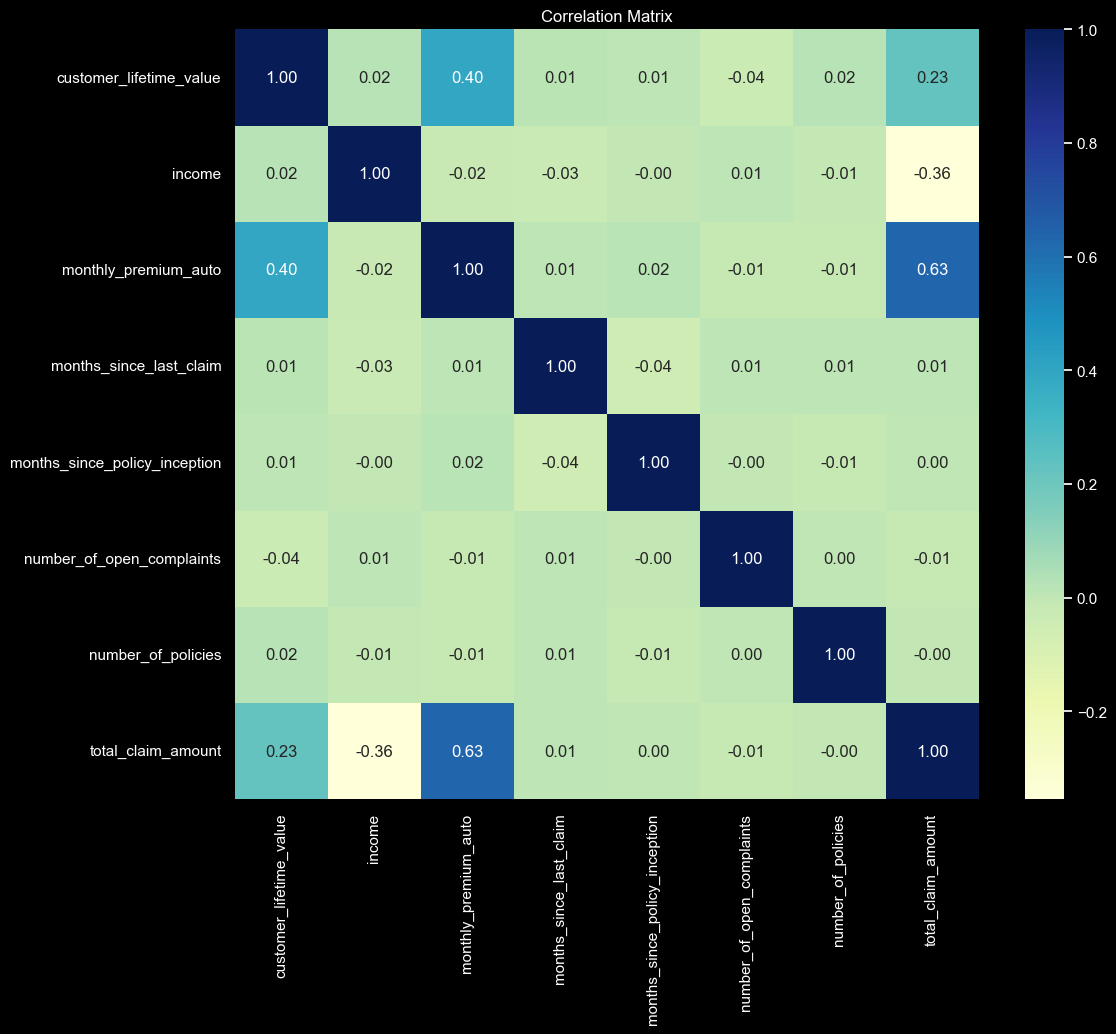

In [8]:
## 6. Plot a correlation matrix, and comment on what you observe.

sns.set(style="darkgrid")
plt.style.use("dark_background")

correlation_matrix  = customer_df.corr(numeric_only=True)

## Correlation matrix plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix , annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## We observe that:

## Customer Lifetime Value & Monthly Premium Auto: There is a moderate positive correlation (0.40), meaning that as customer lifetime value increases, so does the monthly premium auto. This implies that customers with higher value tend to purchase more premium policies.

## Total Claim Amount & Monthly Premium Auto: There is a strong positive correlation (0.63), which is logical because higher premiums often result in higher claim amounts, reflecting potentially higher coverage.

## Months Since Policy Inception & Months Since Last Claim: There is a very low positive correlation (0.005), indicating almost no direct relationship between the length of the policy and the time since the last claim.

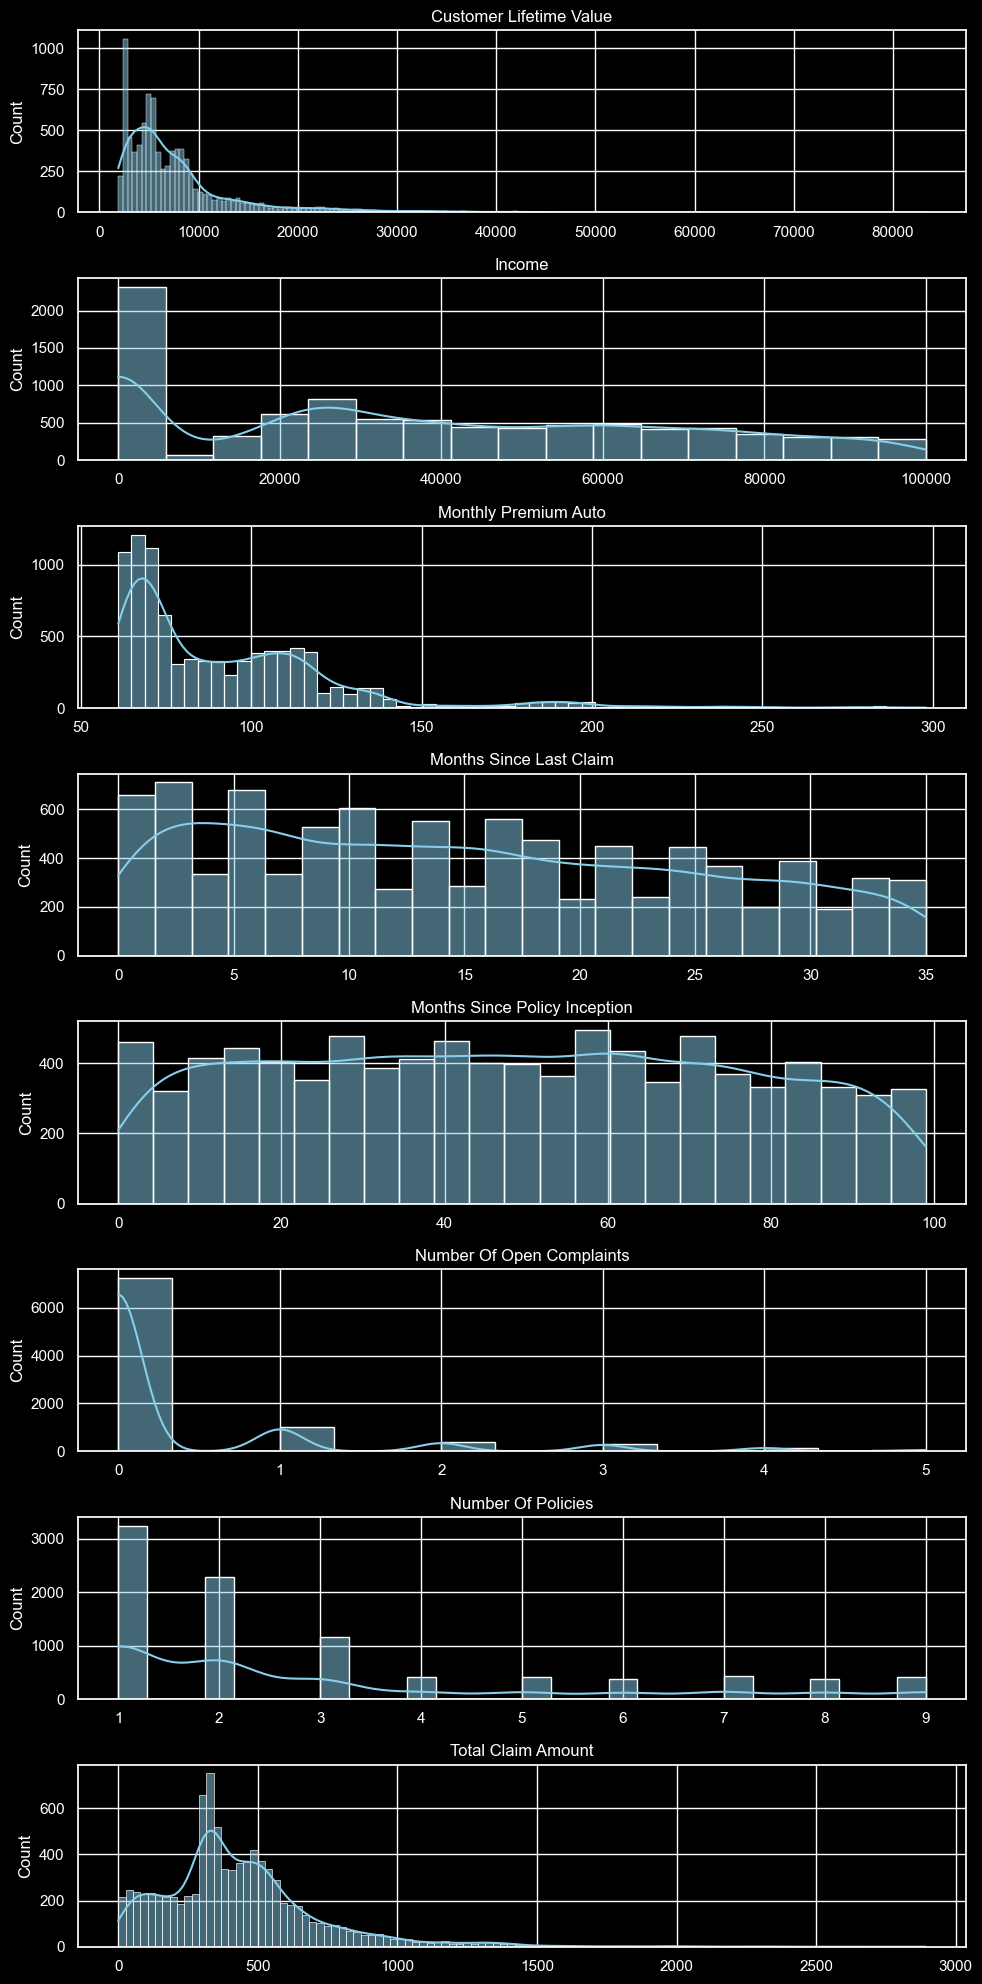

In [9]:
## 7. Plot every continuous variable. Comment what you can see in the plots.

# Selecting continuous variables
continuous_vars = customer_df.select_dtypes(include=['float64', 'int64']).columns

# Plotting histograms
plt.figure(figsize=(10, 20))
for i, var in enumerate(continuous_vars):
    plt.subplot(len(continuous_vars), 1, i+1)
    sns.histplot(customer_df[var], kde=True, color="skyblue")
    plt.title(var.replace('_', ' ').title())
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [10]:
## Customer Lifetime Value: The distribution is right-skewed, indicating that there are more customers with lower lifetime values and a few with very high values. 
## This suggests that the majority of customers fall into the lower end of the value spectrum.

## Income: The distribution is bimodal, with a significant peak at the lower end, likely representing unemployed or low-income customers, 
## and another broader distribution across higher income values. This reflects a diverse customer base in terms of economic status.

## Monthly Premium Auto: Also right-skewed, similar to the customer lifetime value, indicating that most customers pay lower premiums, 
## with fewer customers opting for or requiring more expensive coverage.

## Months Since Last Claim and Months Since Policy Inception: Show uniform distribution, indicating that claims and policy durations are spread out 
## over time without significant clustering at specific periods.

## Number of Open Complaints: Heavily skewed towards zero, showing that most customers have few to no complaints, which could indicates satisfaction 
## or a non-confrontational customer base.

## Number of Policies: Shows a declining trend as the number of policies increases, indicating that most customers hold fewer policies, 
## with diminishing numbers holding multiple policies.

## Total Claim Amount: Right-skewed like the premium and lifetime value distributions, showing many small claims and fewer large claims, 
## typical of general insurance claim distributions.

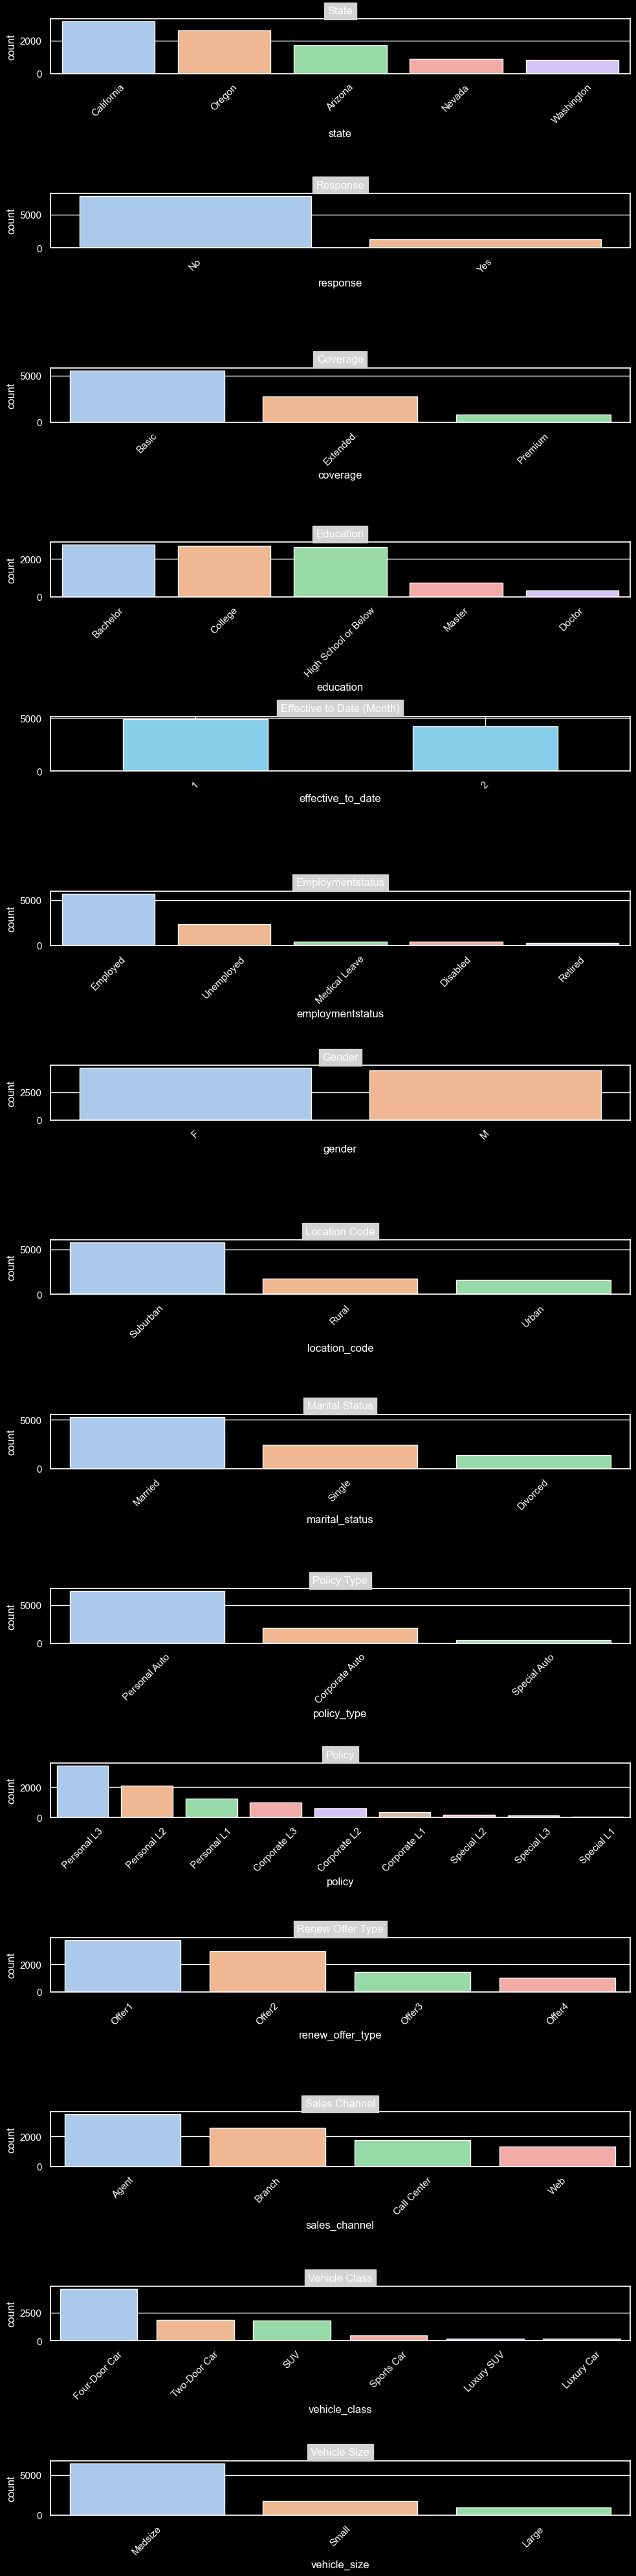

In [11]:
# 8. Dropping the 'customer' column is required since it represents each row and in this case is not useful at all 
customer_df = customer_df.drop('customer', axis=1)
categorical_vars = customer_df.select_dtypes(include=['object', 'datetime64[ns]']).columns


# Plotting for categorical variables (method: bar plot)
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(10, 40))

for i, var in enumerate(categorical_vars):
    if var == 'effective_to_date':
        # Counting entries per month to keep it categorical
        monthly_counts = customer_df[var].dt.month.value_counts().sort_index()
        monthly_counts.plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_title('Effective to Date (Month)', backgroundcolor='lightgrey')
    else:
        # Countplot for other categorical variables
        order = customer_df[var].value_counts().index
        sns.countplot(data=customer_df, x=var, ax=axes[i], order=order, palette='pastel')
        axes[i].set_title(var.replace('_', ' ').title(), backgroundcolor='lightgrey')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
## State: The data indicates California has the largest customer base, suggesting a strong market presence or a preference for this insurance company in that state.

## Response: A large majority of customers did not respond to the marketing efforts, indicating a need to reassess the approach to increase engagement.

## Coverage: Basic coverage is the most common, followed by extended and premium, showing a customer preference for cost-effective insurance options.

## Education: The distribution across education levels is quite even, with slightly more customers having a Bachelor's degree. This suggests the customer base is evenly spread across different educational backgrounds.

## EmploymentStatus: The majority of the customer base is employed, which could be correlated with the ability to afford insurance. Unemployed and other categories indicate diversity in customer employment status.

## Gender: The distribution between male and female customers is almost equal, indicating no significant gender bias in policy ownership.

## Location Code: Suburban locations have the highest number of customers, which could be due to demographic distributions or preferences in those areas.

## Marital Status: Married individuals constitute the largest group, potentially indicating a tendency for married couples to secure insurance.

## Policy Type and Policy: Personal Auto is the most common policy type, with Personal L3 being the most common policy. This indicates a preference or need for personal vehicle insurance among the customers.

## Renew Offer Type: Offer1 appears to be the most accepted or selected offer, suggesting it might be the most attractive in terms of benefits or costs.

## Sales Channel: The agent channel is the most popular for sales, highlighting the importance of personal interaction in insurance sales.

## Vehicle Class: Four-Door Car is the most insured vehicle class, likely due to its commonality. Luxury vehicles have the fewest insurances, which could reflect their lower population or higher insurance costs.

## Vehicle Size: Medium-sized vehicles are the most common among the insured, suggesting a preference or prevalence of this size in the customer vehicle portfolio.

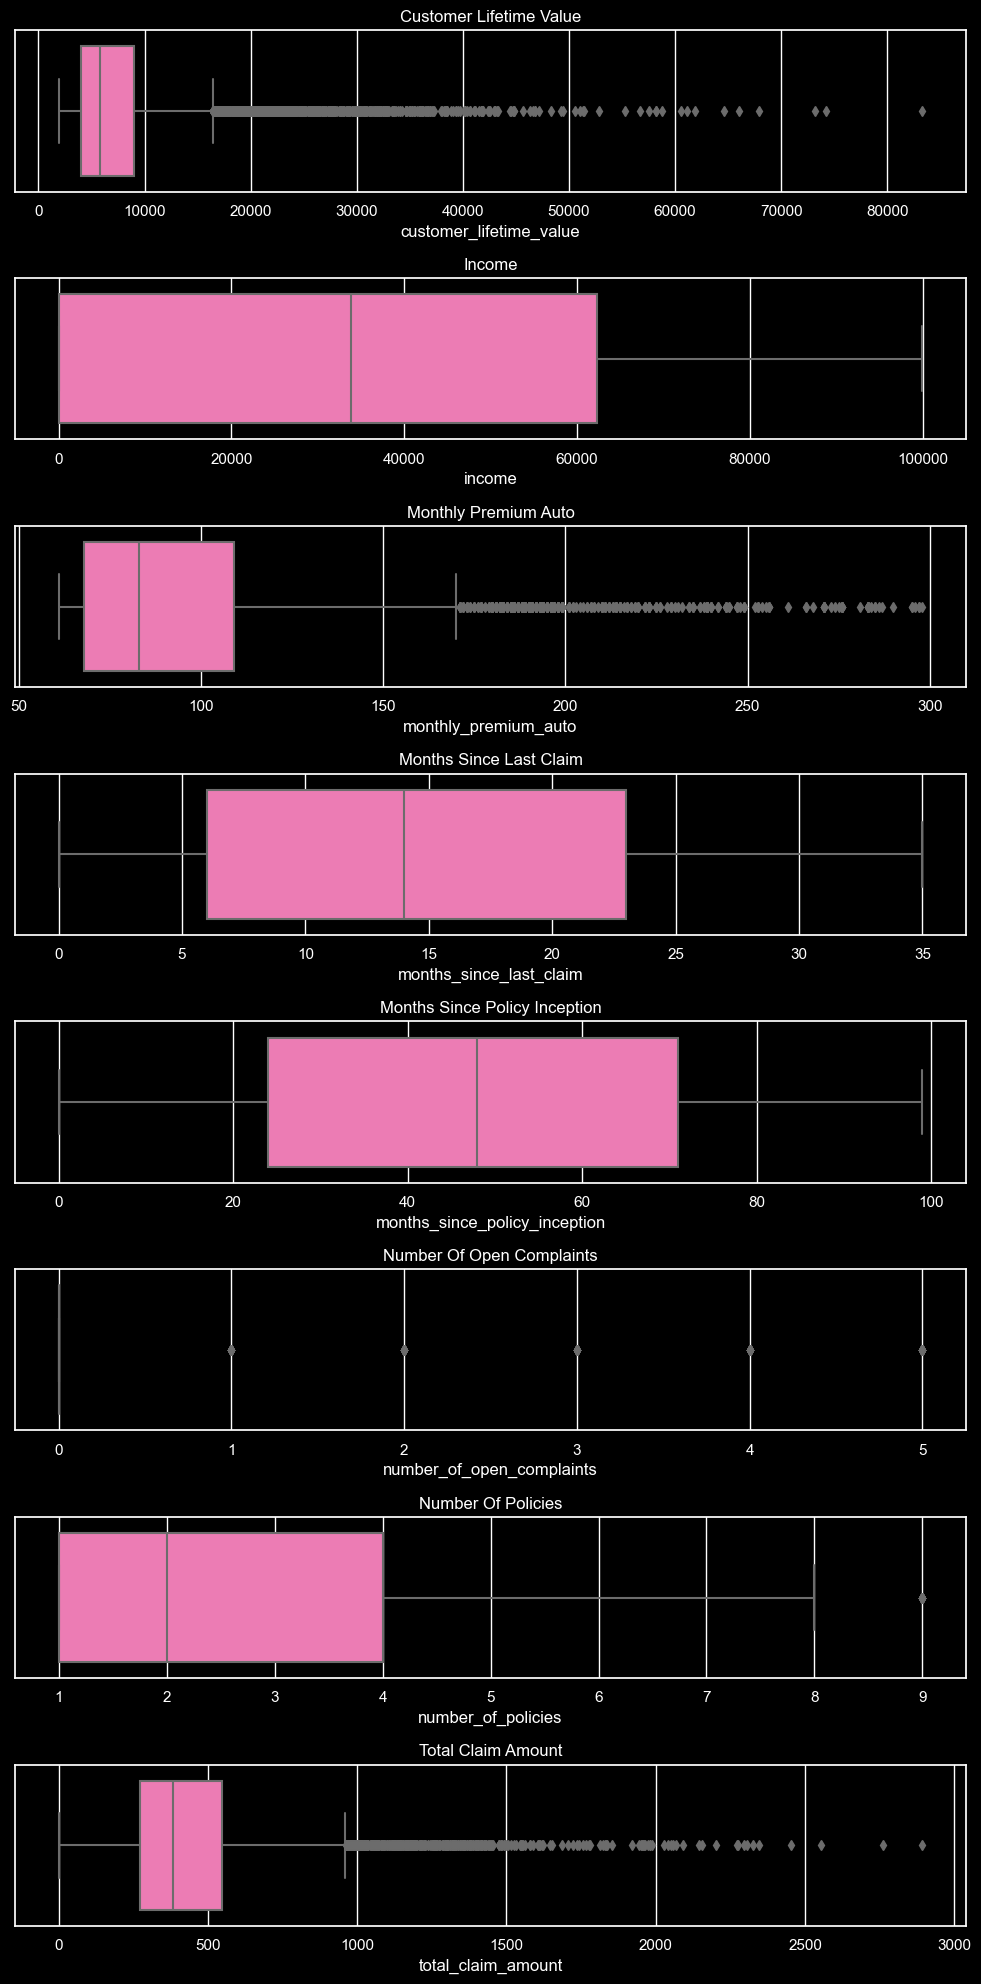

In [12]:
# Look for outliers in the continuous variables
continuous_var = customer_df.select_dtypes(include=['int64', 'float64']).columns


fig, axes = plt.subplots(nrows=len(continuous_var), ncols=1, figsize=(10, 20))

for i, var in enumerate(continuous_var):
    sns.boxplot(x=customer_df[var], ax=axes[i], color="#FF69B4")  # Pink color
    axes[i].set_title(var.replace('_', ' ').title())

plt.tight_layout()
plt.show()

In [ ]:
## Handling with outliers:

## Outliers found in customer lifetime value, monthly premium auto, and total claim amount should be investigated further.
## They could indicate high-value customers or specific segments.
## If we remove them in this case without firslty analysing this might result in loosing some important insights.
## Data cleaning, or data modeling, addressing outliers with transformation, capping, or removal may improve model accuracy and generalization.


In [14]:
## 10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.


nan_values = customer_df.isna().sum()

nan_values

## We dont have to do anything because there are not NaN values

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64